In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import time

In [2]:
# loading data
X = pd.read_csv("q3/logisticX.csv", header = None)
Y = pd.read_csv("q3/logisticY.csv", header = None)
X.columns = ["x1", "x2"]
Y.columns = ["y"]
X["x0"] = 1

In [3]:
# normalising x values
x1_mean = np.mean(X["x1"])
x1_std = np.std(X["x1"])
x2_mean = np.mean(X["x2"])
x2_std = np.std(X["x2"])
X["x1"] = (X["x1"] - x1_mean)/x1_std
X["x2"] = (X["x2"] - x2_mean)/x2_std

In [4]:
# reshaping the data into arrays
X_data = X[["x0", "x1", "x2"]].to_numpy()
Y_data = Y.to_numpy()

In [5]:
# initialising parameters
theta = np.zeros((3, 1))

In [6]:
# calculating h(ϑ)
v = np.dot(X_data, theta)
hx = (1/(1+np.exp(-v)))

In [7]:
# calculating negative log lookelihood and the gradient of the negative log likelihood
neg_log_lik = np.dot(np.log(hx).T, Y_data) + np.dot(np.log(1-hx).T, 1-Y_data)
grad_log_lik = np.dot(X_data.T, hx-Y_data)

In [8]:
# calculating the hessian of the negative log likelihood
diag_hx = np.identity(X_data.shape[0]) * np.dot(hx.T, 1-hx)
hessian = np.dot(X_data.T, np.dot(diag_hx, X_data))

In [9]:
# appying newton's method to update theta 
theta = theta - np.dot(np.linalg.inv(hessian), grad_log_lik)

In [10]:
# finding lists of indexes for each class of y = {0, 1}
y0_list = [i for i in range(0, len(Y_data)) if Y_data[i] == 0]
y1_list = [i for i in range(0, len(Y_data)) if Y_data[i] == 1]

In [11]:
# generating the decision boundary
intercept = -theta[0]/theta[2]                                   # intercept of the decision boundary
slope = -theta[1]/theta[2]                                       # slope of the decision boundary
x_decision = np.linspace(-3, 3, 30)
y_decision = slope*x_decision + intercept                        # decision boundary

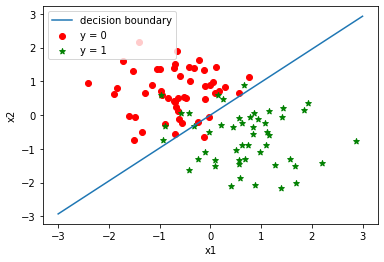

In [12]:
# plotting the data points (each class is in a different color) and the decision boundary
fig = plt.figure()
plt.scatter(X["x1"][y0_list], X["x2"][y0_list], color = "red", marker = "o", label = "y = 0")
plt.scatter(X["x1"][y1_list], X["x2"][y1_list], color = "green", marker = "*", label = "y = 1")
plt.plot(x_decision, y_decision, label = "decision boundary")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()